<a href="https://colab.research.google.com/github/dk3156/Dongje-Kim-CS4613/blob/main/take_at_home_dk3156.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm - Spring 2023

## Problem 1: Take-at-home  (45 points total)

You are applying for a position at the data science team of USDA and you are given data associated with determining appropriate parasite treatment of canines. The suggested treatment options are determined based on a **logistic regression** model that predicts if the canine is infected with a parasite. 

The data is given in the site: https://data.world/ehales/grls-parasite-study/workspace/file?filename=CBC_data.csv  and more specifically in the CBC_data.csv file. Login using you University Google account to access the data and the description that includes a paper on the study (**you dont need to read the paper to solve this problem**). Your target variable $y$ column is titled `parasite_status`. 




### Question 1 - Feature Engineering (5 points)

Write the posterior probability expressions for logistic regression for the problem you are given to solve.

$$p(y=1| \mathbf{x}, \mathbf w)= \frac{1}{1 + e^{(-w^T x)}}$$ 

$$p(y=0| \mathbf{x}, \mathbf w)= 1 - \frac{1}{1 + e^{(-w^T x)}}$$ 



### Question 2 - Decision Boundary (5 points)

Write the expression for the decision boundary assuming that $p(y=1)=p(y=0)$. The decision boundary is the line that separates the two classes.





$$w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} ... + w_{m}x_{m} = 0$$
for m is total number of observations



### Question 3 - Loss function (5 points)

Write the expression of the loss as a function of $\mathbf w$ that makes sense for you to use in this problem. 

NOTE: The loss will be a function that will include this function: 

$$\sigma(a) = \frac{1}{1+e^{-a}}$$



Let $$ b = \sigma(w^T x)$$
Then,
$$L_{CE} = -\frac{1}{m} \Sigma_{i=1}^{m} (ylog(b) + (1-y)log(1-b)) $$

when m is total number of observations


### Question 4 - Gradient (5 points)

Write the expression of the gradient of the loss with respect to the parameters - show all your work.




Let $$ z = w^T x $$ 
Let $$ b = \sigma(z)$$
Let L be a loss function for a single observation.

$$ L =  -[ylog(b) + (1 - y)log(1 - b)]$$

First we caculate derivative of the loss function for single observation. 

We calculate $$\frac{dL}{dw_{1}}$$ 
$$$$

$$\frac{dL}{dw_{1}} = \frac{dL}{db} * \frac{db}{dw_{1}} = \frac{dL}{db} * \frac{db}{dz} * \frac{dz}{dw_{1}}$$ 

$$$$
$$ \frac{dL}{db} = \frac{-y}{b} - \frac{1-y}{1-b}$$
$$$$

$$ \frac{db}{dz} = \frac{e^{-z}}{(1 + e^{-z})^2}$$
$$$$

Substitute $$ e^{-z} = \frac{(1 - b)}{b}$$ and $$ \frac{1}{(1+e^{-z})^2} = b^2 $$ to 

$$\frac{e^{-z}}{(1 + e^{-z})^2}$$

Then, 

$$ \frac{db}{dz} =  \frac{(1-b)  b^2}{b} = (1 - b)b $$

$$$$
$$\frac{dz}{dw} = x + 0 = x$$

Therefore,
$$\frac{dL}{dw} = (\frac{-y}{b} + \frac{1-y}{1-b}) * b (1 - b) * x = \frac{-y + by + b -by}{b(1-b)} * b (1 - b) * x = (b-y)x$$

Consequently

$$\frac{dL}{dw_{1}} = (b - y) x_{1}$$
$$\frac{dL}{dw_{2}} = (b - y) x_{2}$$
...
$$\frac{dL}{dw_{n}} = (b - y) x_{n}$$
$$$$
$$ \nabla_\mathbf w L_{CE} = \frac{dL}{dW} = (A - Y) X$$
$$$$
for W is a matrix consisted of all coefficients
$$$$
for A is a matrix consisted of all predictions
$$$$
for Y is a matrix consisted of all output values
$$$$
for X is a matrix consisted of all input values


### Question 5 - Imbalanced dataset (10 points)

You are now told that in the dataset  

$$p(y=0) >> p(y=1)$$

Can you comment if the accuracy of Logistic Regression will be affected by such imbalance?



Because the dataset is imbalanced in favor of y = 0, training the logistic regression model with such imbalanced dataset will result in inaccurate prediction. In this case, the logistic Regression will heavily favor the result of 0. 

One way to prevent this problem is to modify the model to take the skewed distribution into account. This can be achieved by specifying a class weighting configuration that is used to influence the amount that logistic regression coefficients are updated during training.


### Question 6 - SGD (15 points)

The interviewer was impressed with your answers and wants to test your programming skills. 

1. Use the dataset to train a logistic regressor that will predict the target variable $y$. 

 2. Report the harmonic mean of precision (p) and recall (r) i.e the  [metric called $F_1$ score](https://en.wikipedia.org/wiki/F-score) that is calculated as shown below using a test dataset that is 20% of each group. Plot the $F_1$ score vs the iteration number  $t$. 

$$F_1 = \frac{2}{r^{-1} + p^{-1}}$$

Your code includes hyperparameter optimization of the learning rate and mini batch size. Please learn about cross validation which is a splitting strategy for tuning models [here](https://scikit-learn.org/stable/modules/cross_validation.html).

You are allowed to use any library you want to code this problem.



/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0.48420153714773695


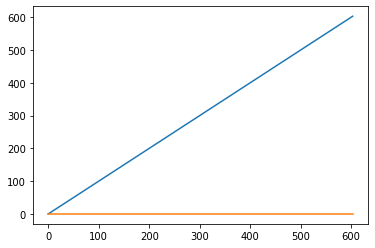

0.9387417218543046


In [ ]:
from pandas.core import describe
# write your code here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

col_names = ['id', 'sex', 'typearea', 'sex_repro', 'repro_status', 'age', 'parasite_status', 'rbc','hgb','wbc','eos_cnt','mono_cnt','nut_cnt','pl_cnt','lymp_cnt']
db = pd.read_csv("./sample_data/CBC_data.csv", skiprows=1, header=None, names=col_names)
db.dropna()

names = ['sex', 'typearea', 'sex_repro', 'repro_status']
X = db[names]
X.sex= X.sex.astype('category').cat.codes
X.typearea= X.typearea.astype('category').cat.codes
X.sex_repro= X.sex_repro.astype('category').cat.codes
X.repro_status= X.repro_status.astype('category').cat.codes
y = db.parasite_status.astype('category').cat.codes

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
# a = X_train.isnull()
# print(a)
regression = LogisticRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)
y_test = y_test.to_numpy()
score = f1_score(y_test, y_pred, average='macro')

iter = []
f1 = []
for i in range(y_pred.size):
  iter.append(i)
  f1.append(score)

plt.plot(iter)
plt.plot(f1)
plt.show()

# for i in range(y_pred.size):
#   scores = f1_score(y_test[i], y_pred[i], average='macro')
#   print(scores)

def accuracy(y_pred, y_test):
  return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)